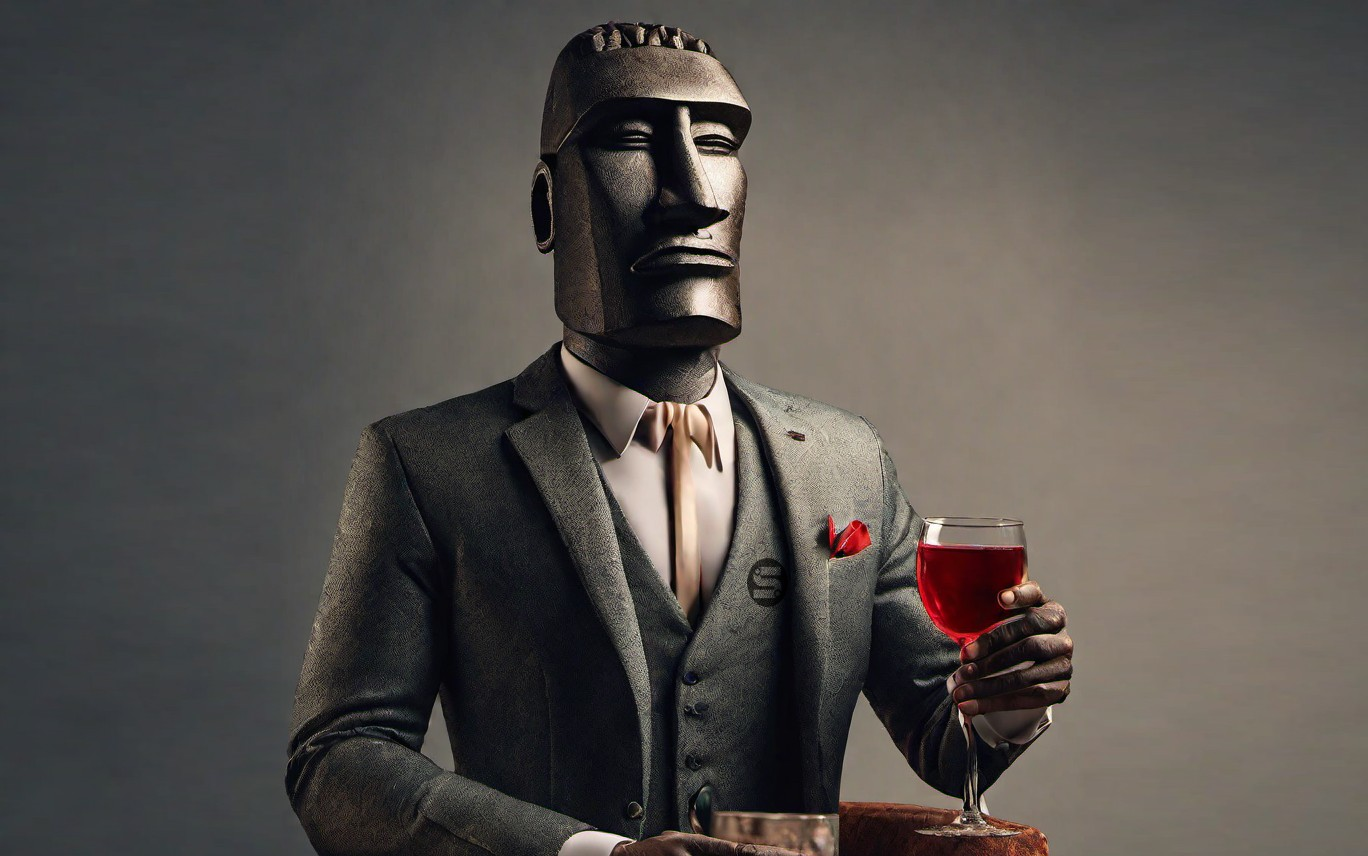

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, ActivityRegularization
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [ ]:
wine_df = pd.read_csv('WineQT.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

Nesta parte do código, estamos organizando os dados para que possamos usá-los.
separamos nossos dados em duas partes. Um conjunto contém as informações sobre os vinhos, como sua acidez, teor alcoólico, etc. `(armazenado em 'X')`. O outro conjunto `('y')` contém a qualidade desses vinhos, que é o que queremos prever com nosso modelo.

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer='l2'))
model.add(Dropout(0.5))  # Dropout para evitar overfitting
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dense(10, activation='softmax'))

learning_rate = 0.1
batch_size = 32
epochs = 50
dropout_rate = 0.2

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

criando e configurando a rede neural.
 Primeira Camada: Esta é a primeira camada da nossa rede neural. Ela possui 64 neurônios (ou unidades) e usa a função de ativação 'relu'. Isso ajuda a rede a aprender padrões nos dados de entrada. A entrada para esta camada tem um tamanho igual ao número de características nos nossos dados de treinamento (input_dim=X_train.shape[1]). Além disso, aplicamos regularização L2 aos pesos dessa camada para evitar overfitting.
Camada Dropout: Essa camada ajuda a prevenir o overfitting, desligando aleatoriamente alguns neurônios durante o treinamento. Aqui, estamos desligando 50% dos neurônios (Dropout(0.5)).



In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)


Epoch 1/50
23/23 - 1s - loss: 3.0454 - accuracy: 0.1245 - val_loss: 2.6558 - val_accuracy: 0.4536 - 972ms/epoch - 42ms/step
Epoch 2/50
23/23 - 0s - loss: 2.4778 - accuracy: 0.4227 - val_loss: 2.1950 - val_accuracy: 0.4809 - 77ms/epoch - 3ms/step
Epoch 3/50
23/23 - 0s - loss: 2.1260 - accuracy: 0.4637 - val_loss: 1.8466 - val_accuracy: 0.5137 - 84ms/epoch - 4ms/step
Epoch 4/50
23/23 - 0s - loss: 1.8568 - accuracy: 0.5144 - val_loss: 1.6391 - val_accuracy: 0.5847 - 87ms/epoch - 4ms/step
Epoch 5/50
23/23 - 0s - loss: 1.7392 - accuracy: 0.5376 - val_loss: 1.5436 - val_accuracy: 0.6011 - 88ms/epoch - 4ms/step
Epoch 6/50
23/23 - 0s - loss: 1.6484 - accuracy: 0.5581 - val_loss: 1.4987 - val_accuracy: 0.6120 - 84ms/epoch - 4ms/step
Epoch 7/50
23/23 - 0s - loss: 1.5862 - accuracy: 0.5800 - val_loss: 1.4435 - val_accuracy: 0.6120 - 88ms/epoch - 4ms/step
Epoch 8/50
23/23 - 0s - loss: 1.5191 - accuracy: 0.5800 - val_loss: 1.4087 - val_accuracy: 0.6448 - 88ms/epoch - 4ms/step
Epoch 9/50
23/23 - 0s 

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
confusion = confusion_matrix(y_test, y_pred_classes)
print(f"Acurácia do modelo: {accuracy}")

8/8 [==============================] - 0s 3ms/step
Acurácia do modelo: 0.5720524017467249


- Este trecho de código é usado para avaliar o desempenho do modelo treinado nos dados de teste.
- Essas etapas de avaliação são essenciais para entender o quão eficaz é o modelo em fazer previsões precisas e identificar áreas onde ele pode precisar de melhorias.

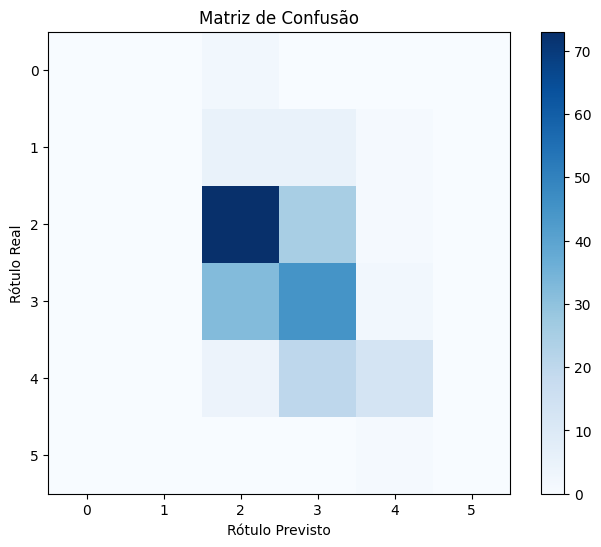

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap='Blues')
plt.colorbar()
plt.title('Matriz de Confusão')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Real')
plt.show()

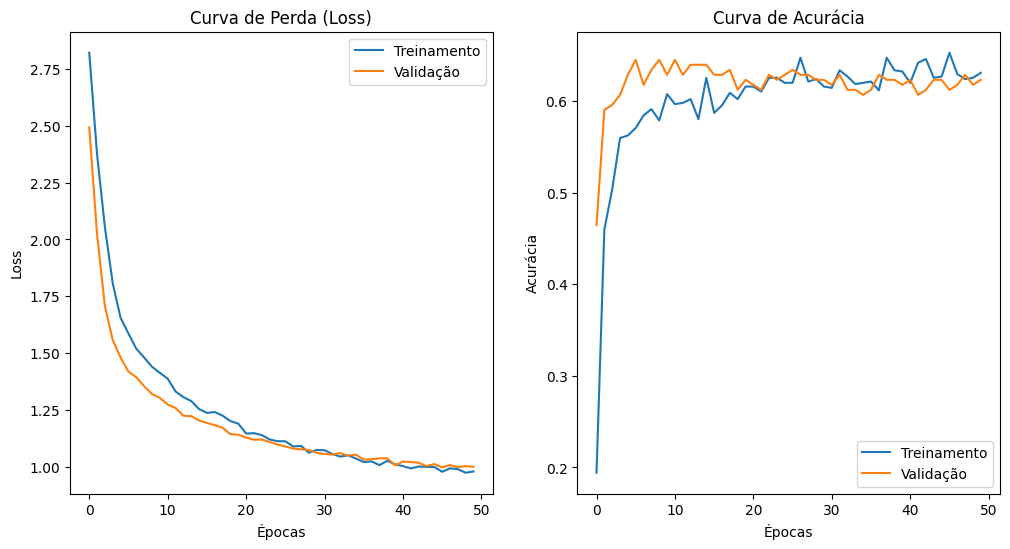

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de Perda (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Curva de Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

 Aqui, estamos criando gráficos para acompanhar como nosso modelo está aprendendo ao longo do tempo.
 # grafico 1
- O eixo horizontal representa as épocas, ou seja, as passagens completas pelo conjunto de treinamento.
- O eixo vertical mede a perda, que é uma medida de quão longe as previsões do modelo estão dos valores reais.
- A linha azul representa a perda durante o treinamento, enquanto a linha laranja representa a perda durante a validação.
- O objetivo é ver ambas as linhas diminuindo, o que indica que o modelo está melhorando.

# Gráfico 2 :
- os eixos da vertical e da horizontal são iguais.
- A linha azul representa a acurácia durante o treinamento, enquanto a linha laranja representa a acurácia durante a validação.
- A meta é ver ambas as linhas se aproximando, sugerindo que o modelo está ficando mais preciso.